# Visualization with Python I



<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="http://yogen.io/assets/logo.svg" alt="yogen" style="width: 200px; float: right;"/>

# `matplotlib`
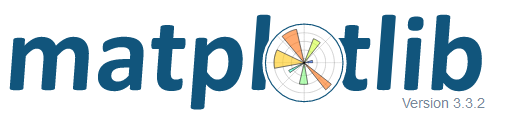


https://matplotlib.org/

In [123]:
#surge imitando otras librerias
#atair(nuevo)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Matplotlib basic plotting

A MATLAB-like plotting framework: [`pyplot`](https://matplotlib.org/api/pyplot_api.html). 

Also known as the "state-machine environment" because we can call methods of a global state machine and they will affect the appropiate objects.

### Lines

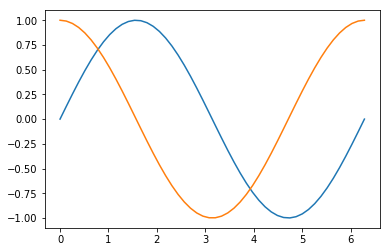

In [2]:
xs = np.linspace(0, 2*np.pi)
ss = np.sin(xs)
cs = np.cos(xs)

plt.plot(xs, ss) #pasar 2 secuencias arrays, series...
plt.plot(xs,cs)

#### Exercise

Plot the logistic function 


$$f(x) = \frac{e^x}{1 + e^x}$$

Between -7 and 7


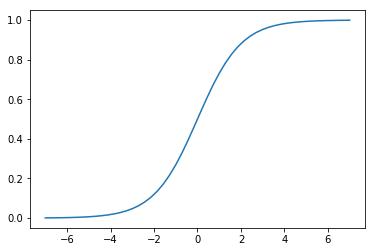

In [3]:
xs = np.linspace(-7,7)
ys = np.exp(xs)/(1 + np.exp(xs))

plt.plot(xs, ys)

In [4]:
# donde se puede usar un array se puede meter una serie, solo con el index
# xs == array

### Scatter plots

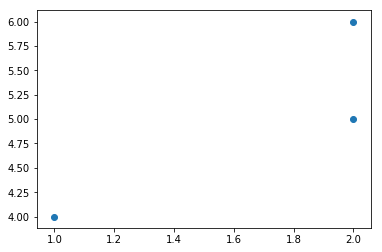

In [5]:
plt.scatter([1,2,2], [4,5,6])

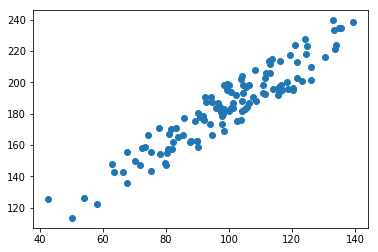

In [6]:
xs =np.random.randn(120) # rdn distrib normal y 120 numero de puntos

xs2 = xs * 20 + 100 

ys= 1.2 *xs2 + 50

jitter = np.random.random(120) * 30 #para meterle ruido
ys2 = ys + jitter

plt.scatter(xs2, ys2)



Here we are using a random noise ("jitter"
) added over the (perfectly following $f(x) = 2x + 20$) Y2 Series in order to get some noisier, more real-looking generated data.


This is what happens if you make a line plot of unsorted data:

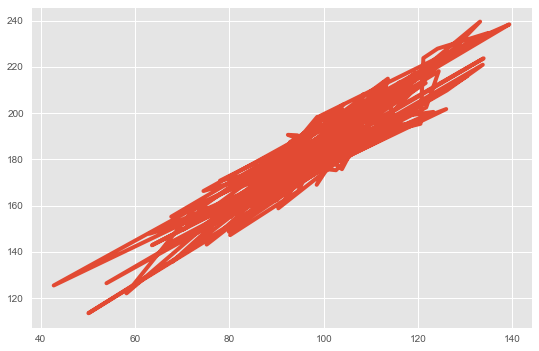

In [121]:
plt.plot(xs2, ys2) 

#### Exercise - 2

Let's draw a circle using a scatter plot, afterwards fill it.

$$r^2 = sen(\phi)^2 + cos(\phi)^2$$

$$x=r \cdot cos(\phi)$$
$$y=r \cdot sin(\phi)$$


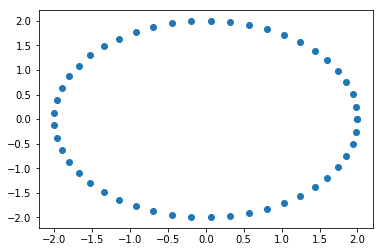

In [8]:
thetha = np.linspace(0, 2*np.pi)
r=2
# A= r*2 = np.sin(thetha)**2 + np.cos(thetha)**2
xs = r * np.cos(thetha)
ys = r * np.sin(thetha)

plt.scatter(xs, ys)

### Bar plots

Do not confuse with histograms

A bar plot is a plot that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally.

A bar plot shows comparisons among discrete categories. One axis of the plot shows the specific categories being compared, and the other axis represents a measured value.


([<matplotlib.axis.XTick at 0x7f7a862e64e0>,
 <a list of 4 Text xticklabel objects>)

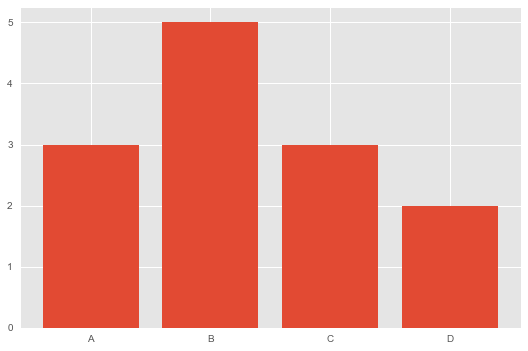

In [124]:
ys = [3,5, 3, 2]
labels = ['A', 'B', 'C', 'D']

xs= range(len(ys)) # valores de 0 a 4

plt.bar(xs,ys)

plt.xticks(xs, labels)



([<matplotlib.axis.YTick at 0x7f7a862cc550>,
 <a list of 4 Text yticklabel objects>)

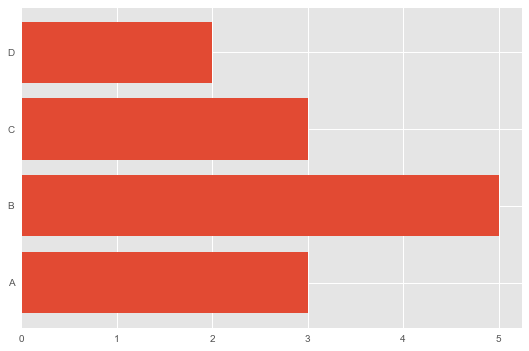

In [125]:
#  barras horizontales

plt.barh( xs, ys)
plt.yticks(xs, labels) 

In [11]:
# valor de retorno

([<matplotlib.axis.YTick at 0x7f4fe3f03be0>,
  <matplotlib.axis.YTick at 0x7f4fe3f034e0>,
  <matplotlib.axis.YTick at 0x7f4fe3f80f28>,
  <matplotlib.axis.YTick at 0x7f4fe37e8ef0>],
 <a list of 4 Text yticklabel objects>). tupla y listas de longitud 4

dice la posicion y el valor de retorno de la función

devuelve una ref del onbjeto ticks y text creados

solo hay una vez que vamos a utilizarlo

IndentationError: unexpected indent (<ipython-input-11-42608b2da580>, line 3)

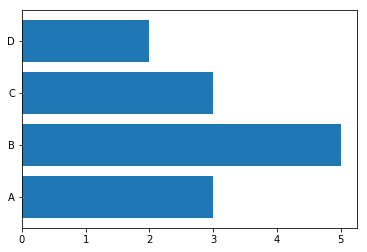

In [12]:
plt.barh( xs, ys)
plt.yticks(xs, labels); #con el punto y coma silenciamos el valor de retorno

#### Histogram
A histogram is an approximate representation of the distribution of numerical data.

To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) must be adjacent, and are often (but not required to be) of equal size

[Wikipedia](https://en.wikipedia.org/wiki/Histogram)


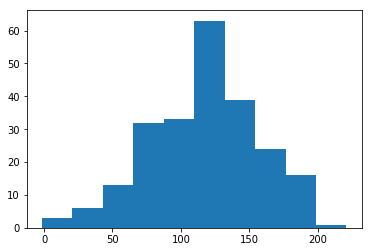

In [13]:
xs = np.random.randn(230) * 40 +120 #media 120 y desv 40
plt.hist(xs);

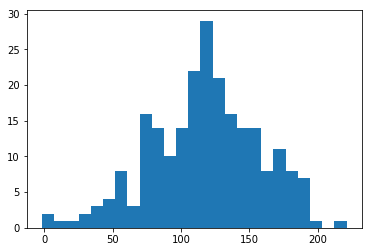

In [14]:
plt.hist(xs, bins =25); #quiero 25 categorias

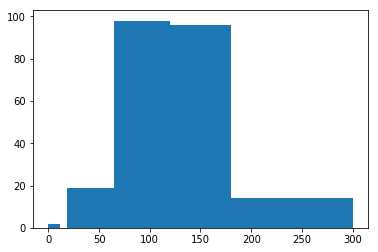

In [15]:
plt.hist(xs, bins=[0,12, 18, 65, 120,180, 300]); #sec que limita los bordes en vex de num de bins

## The object-oriented interface

Essential for finer control.

The recommended procedure is to use pyplot to create figures and the object-oriented interface for plotting. 

We need to know the somewhat confusing [matplotlib terminology](http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure)

![Anatomy of a Matplotlib Figure](http://matplotlib.org/_images/anatomy1.png)

#### Figure

A whole figure which may contain several Axes. It communicates with the `Canvas` for us.

In [16]:
fig =plt.figure()#vacia siin panel

<Figure size 432x288 with 0 Axes>

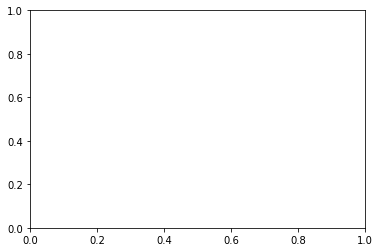

In [17]:
fig, ax = plt.subplots(1,1)

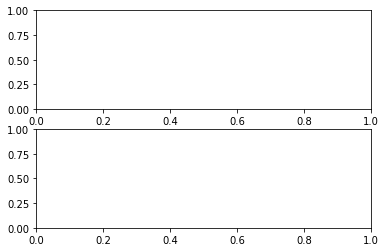

In [18]:
fig, ax = plt.subplots(2,1)

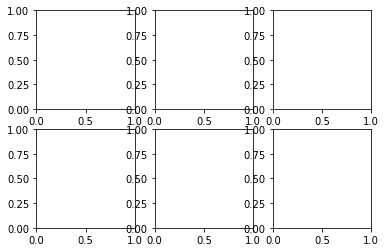

In [19]:
fig, ax = plt.subplots(2,3)

#### Artists

There are two types of Artists: primitives and containers. The primitives represent the standard graphical objects we want to paint onto our canvas: Line2D, Rectangle, Text, AxesImage, etc., and the containers are places to put them (Axis, Axes and Figure).

https://matplotlib.org/users/artists.html

#### Axes vs Axis

An `Axes` (yes, it looks like a plural noun but it's not, necessarily) is a single panel of a figure. An `Axes` contains generally 2, but sometimes 3, `Axis`. It is the object type we'll spend most time interacting with.

`Axis` objects represent the lines in the x and y (and z in the case of 3D plots) dimensions. With them you can control ticks and ticklabels.

### Interlude: the recommended interface for our plotting functions

From [the matplotlib FAQ](http://matplotlib.org/faq/usage_faq.html):

```python
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out
```

(15, 18)

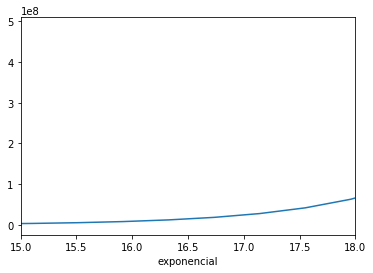

In [20]:
xs = np.linspace(0,20)
exp = np.exp(xs)

plt.plot(xs, exp)
plt.xlabel('exponencial')
plt.xlim(15,18)

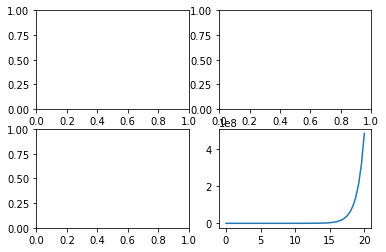

In [21]:
f, ax = plt.subplots(2,2)
plt.plot(xs, exp) # se pone en el ultimo hecho

Text(0.5, 0, 'exponencial')

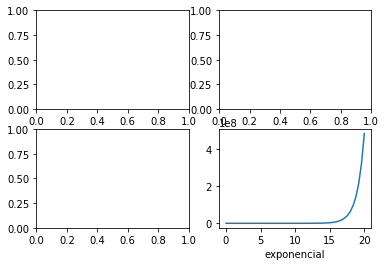

In [22]:
f, ax = plt.subplots(2,2)
plt.plot(xs, exp)
plt.xlabel('exponencial') # poner referencia la eje

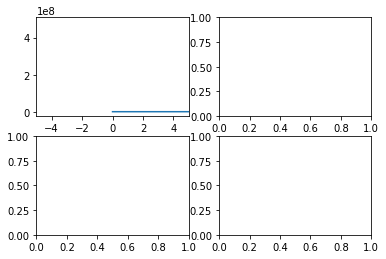

In [23]:
def myplot(axes, data1, data2, **params):
    
    axes.plot(data1, data2)
    axes.set_xlim(-5,5)
    
f, ax = plt.subplots(2,2)

#type(ax) #es una array po eso:

myplot(ax[0,0], xs, exp)

In [24]:
type(ax)

numpy.ndarray

## `add_axes()`, `add_subplot`, and `subplots()` 

We can add Axes to a Figure by calling its add_axes method.

A subplot is just an Axes that we place within an imaginary grid.

For even finer control we can use [GridSpec](http://matplotlib.org/api/gridspec_api.html)

### `add_axes()`

See https://matplotlib.org/users/artists.html

Total flexibility in placing the Axes: we specify `[left, bottom, width, height]` in 0-1 relative figure coordinates.

In [25]:
def generate_points(mu, sigma, A,B, npoints=150):
    xs = np.random.randn(npoints) * sigma +mu
    ys = A *xs +B + np.random.randn(npoints) * B /2
    
    return xs, ys

In [26]:
xs,ys= generate_points(5,2,1.2,2)

In [27]:
f = plt.figure() # vacio

<Figure size 432x288 with 0 Axes>

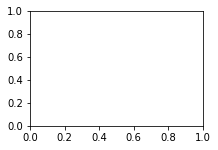

In [28]:
f = plt.figure()
axes = f.add_axes([.2, .3, .4, .4]) # left, bottom. width, height

In [29]:
# al generar imagen recorta

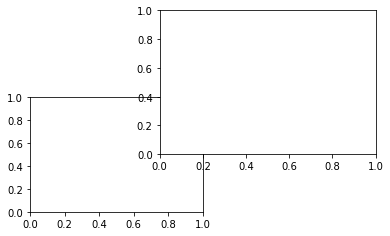

In [30]:
f = plt.figure()
axes = f.add_axes([.2, .3, .4, .4])
axes = f.add_axes([.5, .5, .5, .5])

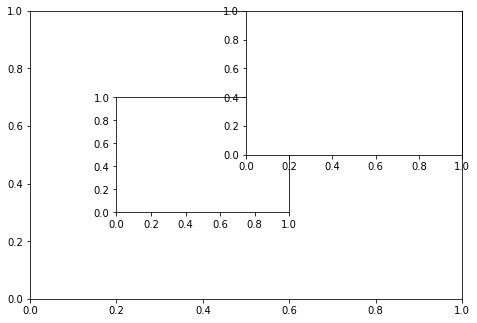

In [41]:
f = plt.figure()
axes= f.add_axes([0,0,1,1])
axes = f.add_axes([.2, .3, .4, .4])
axes = f.add_axes([.5, .5, .5, .5])


In [ ]:
# un panel sitaudo al 20%, un bottom de 30%, ancgura....

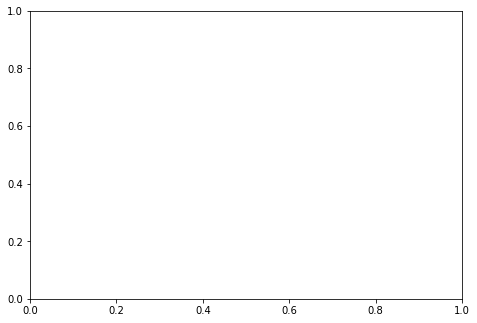

In [52]:
f = plt.figure()
axes= f.add_axes([1,1,1,1])

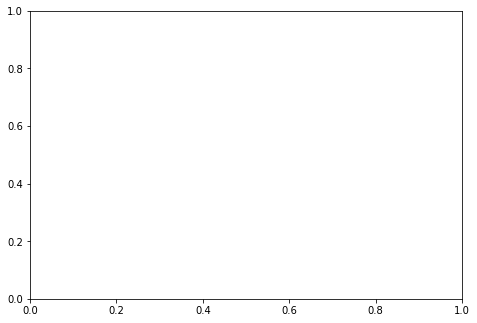

In [56]:

f = plt.figure()
axes= f.add_axes([0,0,1,1])

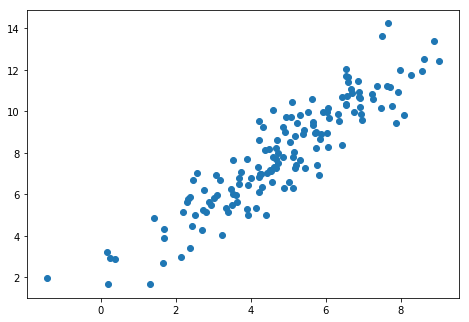

In [57]:
f = plt.figure()
axes= f.add_axes([0,0,1,1])
axes.scatter(xs,ys)

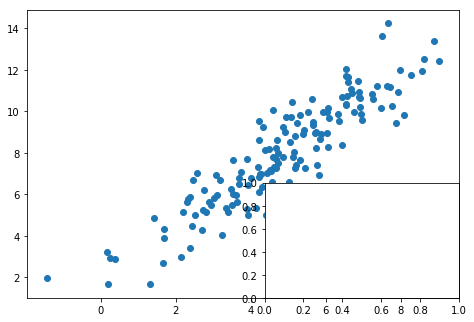

In [58]:
f = plt.figure()
axes= f.add_axes([0,0,1,1])
axes.scatter(xs,ys)

axes2 = f.add_axes([.55, 0, .45,.4])

(9, 11)

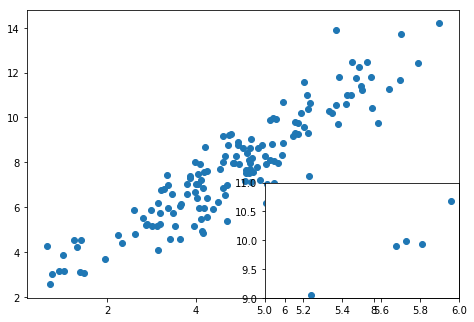

In [43]:
f = plt.figure()
axes= f.add_axes([0,0,1,1])
axes.scatter(xs,ys)

axes2 = f.add_axes([.55, 0, .45,.4])
axes2.scatter(xs,ys)
axes2.set_xlim(5,6)
axes2.set_ylim(9,11) 

### Subplots

We can add them with either `figure.add_subplot()` or create a figure with its subplots directly by calling `plt.subplots()`

### `figure.subplots()`

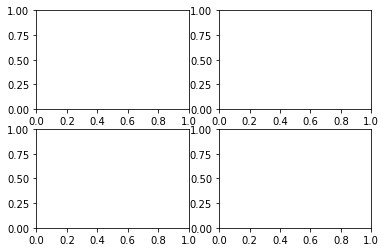

In [60]:
f, ax = plt.subplots(2,2)

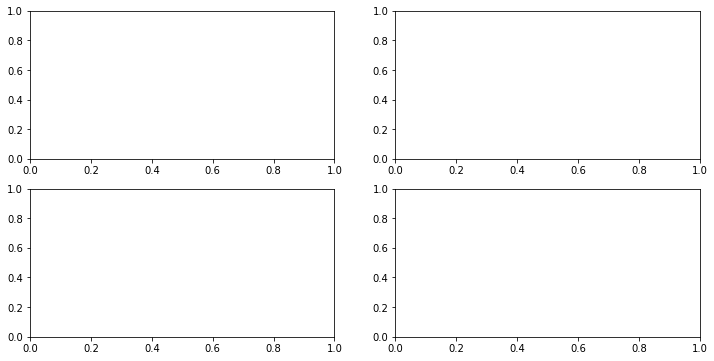

In [62]:

f, ax = plt.subplots(2,2)
f.set_size_inches(12,6)#tamano de los paneles

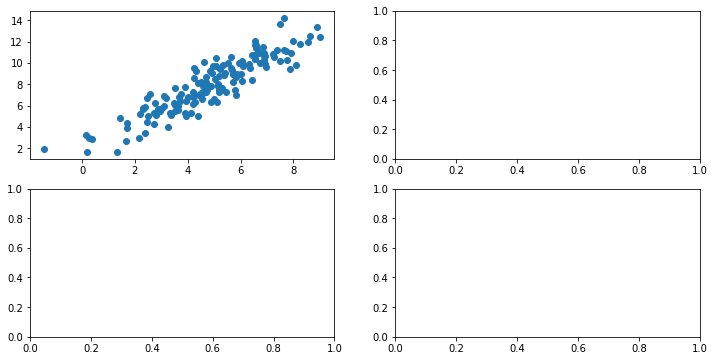

In [63]:
f, ax = plt.subplots(2,2)
f.set_size_inches(12,6)
ax[0,0].scatter(xs,ys) #funciona xq es un array

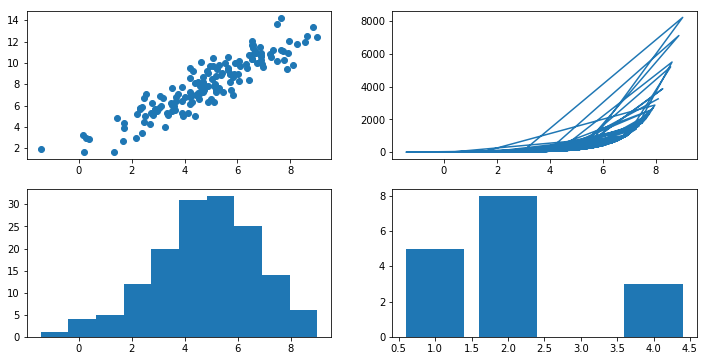

In [64]:

#montar fig multiplanel

f, ax = plt.subplots(2,2)
f.set_size_inches(12,6)
ax[0,0].scatter(xs,ys)

ax[0,1].plot(xs, np.exp(xs))
ax[1,1].bar([1,2,4], [5,8,3])
ax[1,0].hist(xs);

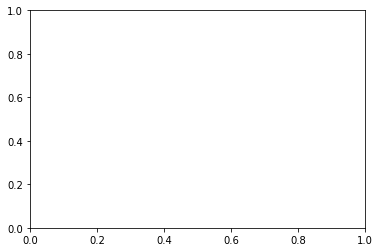

In [65]:
f = plt.figure()# fig vacia
f.add_subplot(1,1,1) # 3 num: especif rejillae,2, y la posicion de entrada del plot

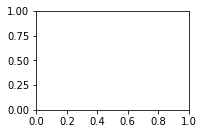

In [66]:
f = plt.figure()# fig vacia
f.add_subplot(2,2,1)

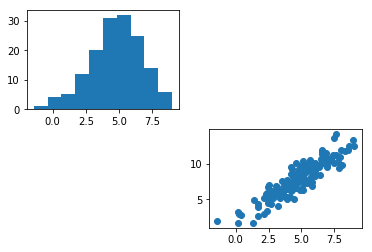

In [69]:
f = plt.figure()# fig vacia
ax = f.add_subplot(2,2,1)
ax.hist(xs)

ax = f.add_subplot(2,2,4) #esto xq distintos rejillas
ax.scatter(xs, ys)

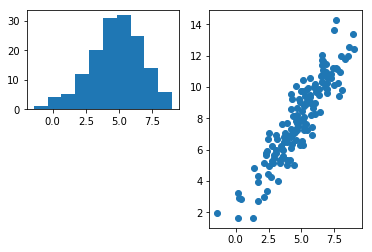

In [70]:
f = plt.figure()# fig vacia
ax = f.add_subplot(2,2,1)
ax.hist(xs)

ax = f.add_subplot(1,2,2) #esto xq distintos rejillas
ax.scatter(xs, ys)

This is probably the most convenient way of working with the object-oriented interface 

### Sharing axis

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log1p
  after removing the cwd from sys.path.


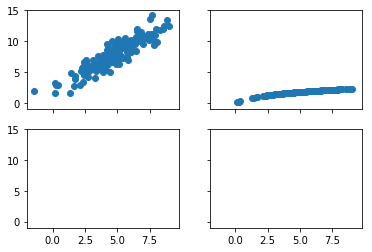

In [73]:
f, ax = plt.subplots(2,2, sharex = True, sharey = True)

ax[0,0].scatter(xs,ys)
ax[0,1].scatter(xs, np.log1p(xs))

### Gridspec

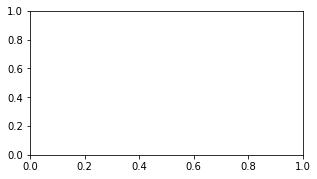

In [46]:
f = plt.figure()
f.set_size_inches(12,6)
spec =f.add_gridspec(3,3, width_ratios =[2,5,6], height_ratios =[1,3,2])

f.add_subplot(spec[1,2])

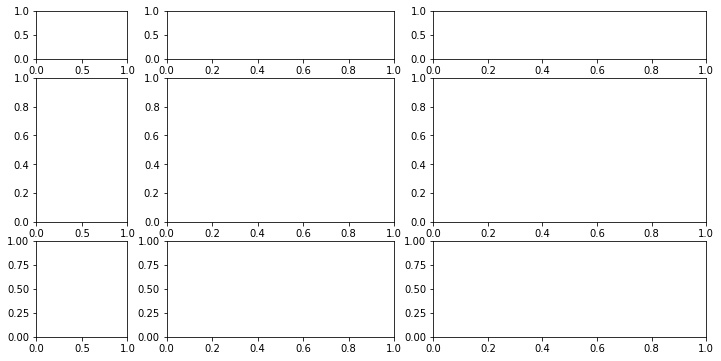

In [50]:
f = plt.figure()
f.set_size_inches(12,6)
spec =f.add_gridspec(3,3, width_ratios =[2,5,6], height_ratios =[1,3,2])

for i in range(3):
    for j in range(3):
        f.add_subplot(spec[i,j])

## `fill_between`

We can fill areas of the plot with solid color

The syntax is 

```python
plt.fill_between(X, Y1, Y2)
```

Where Y1 and Y2 are either `np.array`s or scalar values.

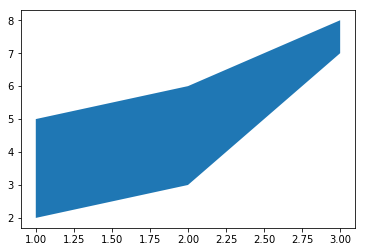

In [82]:
#toma 2 argumentos 

x = [1,2,3]
y1 = [2,3,7]
y2 = [5,6,8]

plt.fill_between(x, y1, y2) # rellena 1 entre 2 y 5, con 2 entre 3 y 6....etc

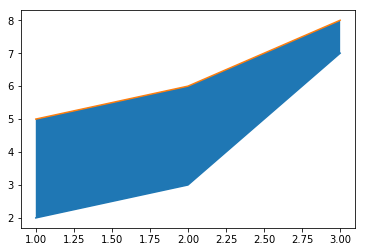

In [83]:
x = [1,2,3]
y1 = [2,3,7]
y2 = [5,6,8]

plt.fill_between(x, y1, y2)
plt.plot(x,y1)
plt.plot(x, y2)

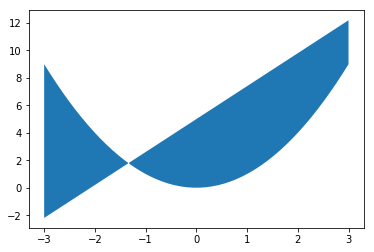

In [51]:
xs = np.linspace(-3,3)
ys_1 = 2.4 * xs +5

ys_2 = xs **2

plt.fill_between(xs, ys_1, ys_2)

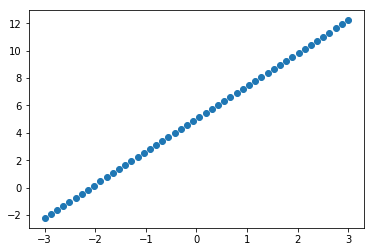

In [54]:
plt.scatter(xs, ys_1)

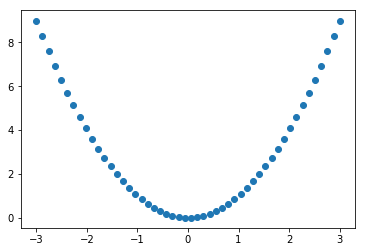

In [55]:
plt.scatter(xs, ys_2)

## `fill_between`(`where=`)

We can fill areas of the plot with solid color differently in different parts of the graph.

The syntax is 

```python
plt.fill_between(X, Y1, Y2, where=boolean_array)
```

Where Y1 and Y2 are either `np.array`s or scalar values, and boolean_array can be constructed from X, from Y, or from whatever you want.

In [ ]:
aeg where en que parte de las x aplica y en cual no

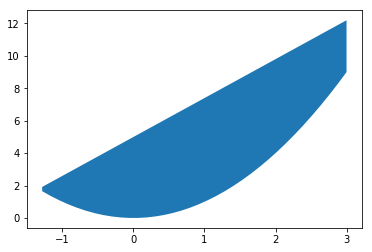

In [85]:
plt.fill_between(xs, ys_1, ys_2, where = ys_1 > ys_2)

In [86]:
ys_1 > ys_2

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [ ]:
#poner colores

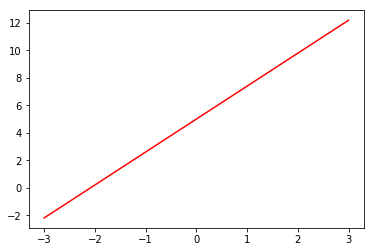

In [87]:
plt.plot(xs, ys_1, color = 'red')

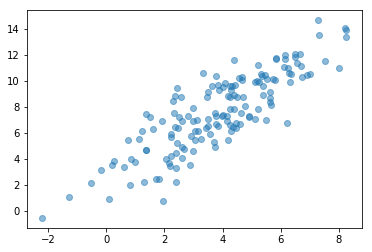

In [90]:
xs, ys = generate_points(4,2,1.2,3)

plt.scatter(xs, ys, alpha = 0.5)

#alpha opacidad (0 a 1)

#### Exercise:
Given this code:
```python
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.plot (X, Y-1, color='blue', alpha=1.00)
plt.show()
```

Reproduce this plot:

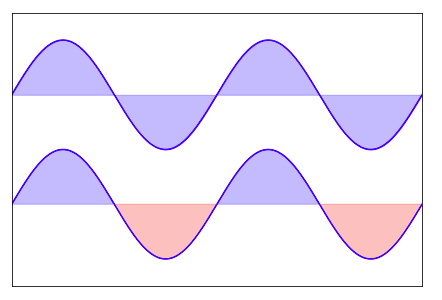



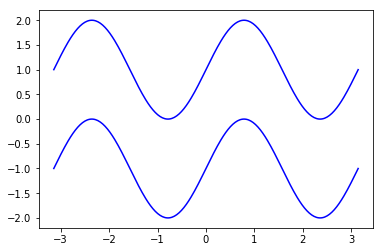

In [91]:
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.plot (X, Y-1, color='blue', alpha=1.00)
plt.show()

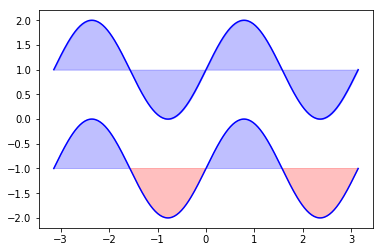

In [57]:
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.plot (X, Y-1, color='blue', alpha=1.00)
plt.fill_between(X, Y+1, 1, alpha = 0.25, color = 'blue')
plt.fill_between(X, Y-1, -1, alpha = 0.25, color='blue', where=Y-1 > -1)
plt.fill_between(X, Y-1, -1, alpha= 0.25, color ='red', where =Y-1 < -1)

In [108]:
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
ones = [1] * len(X) # no hace falta ponerlo porque es un producto escalar
Y = np.sin(2*X)

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.plot (X, Y-1, color='blue', alpha=1.00)

y1 = 0
y2 = -2

#plt.fill_between(X, Y+1,ones, alpha = .25, color = 'blue' ) 
plt.fill_between(X, Y+1,1, alpha = .25, color = 'blue' ) 
plt.fill_between(X, Y-1, 1, alpha = .25, color='blue' where = Y-1 > - 1) 
plt.fill_between(X, Y-1, -1, alpha = .25, color='red' where = Y+1 > 1 ) 


SyntaxError: invalid syntax (<ipython-input-108-b94d6fedf1cd>, line 14)

## Line properties


### Color

https://matplotlib.org/tutorials/colors/colors.html

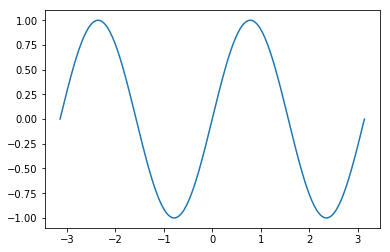

In [109]:
plt.plot(X,Y)

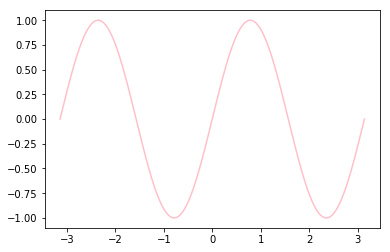

In [110]:
plt.plot(X,Y, color = 'pink')

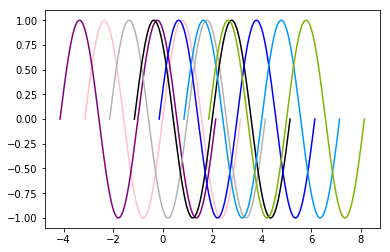

In [123]:
plt.plot(X,Y, color = 'pink')
plt.plot(X-1,Y, color = 'purple')
plt.plot(X+1,Y, color = '.7') # escala de grises
plt.plot(X+2,Y, color = '#000000') #formatohexadecimal rgd 
plt.plot(X+3,Y, color = '#0000FF')
plt.plot(X+4,Y, color = '#0099FF')
plt.plot(X+5,Y, color = (.5, .7, 0))

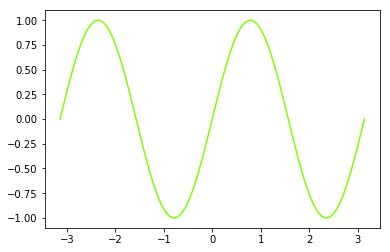

In [124]:
plt.plot(X,Y, color = 'chartreuse')

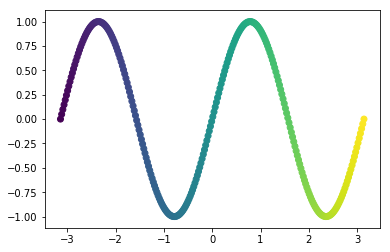

In [126]:
plt.scatter(X,Y, c = X) #poner color a una variable. con plot no se puede, solo un color. hay q poner scatter

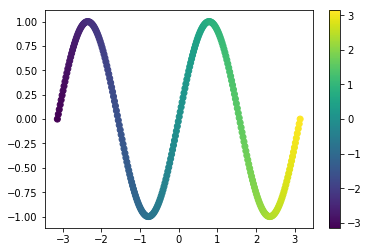

In [127]:
plt.scatter(X,Y, c = X)
plt.colorbar()

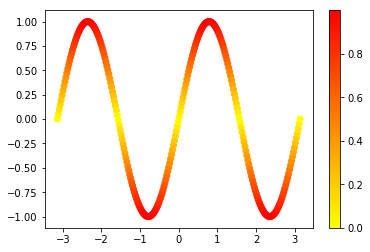

In [59]:
plt.scatter(X,Y, c= abs(Y), cmap='autumn_r')
plt.colorbar()

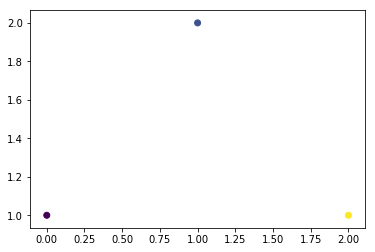

In [132]:
n = [10,30,90]
plt.scatter([0,1,2], [1,2,1], c=n)

### Colormaps

See https://matplotlib.org/users/colormaps.html

You need to choose the appropriate color.

Often, for powerful visualizations it's good to use a muted palette for most of the visualization and reserve one or two accent colors for the points that you want the audience to concentrate on.

If you want to use color to encode variables, choose the appropriate colormap according to the kind of variable that you want to encode.


#### Sequential

![Sequential Colormaps](https://matplotlib.org/_images/grayscale_01_00.png)

#### Divergent

![Divergent Colormaps](https://matplotlib.org/_images/sphx_glr_colormaps_004.png)

#### Qualitative

![Qualitative Colormaps](https://matplotlib.org/_images/sphx_glr_colormaps_006.png)

#### Exercise

Given this code, try to reproduce this graphic taking care of marker size, color and transparency.

```python
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

plt.scatter(X,Y)
plt.show()
```

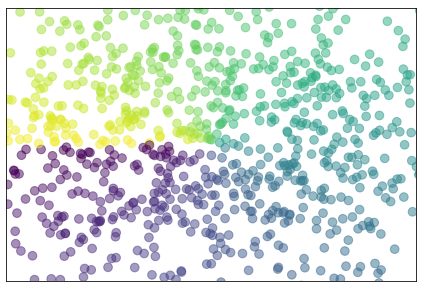

(-1, 1)

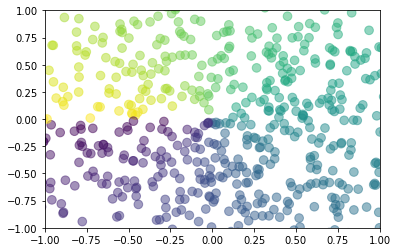

In [60]:
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

ang = np.arctan2(Y,X) 


plt.scatter(X,Y, s = 75, alpha = 0.5,  cmap = 'viridis', c = ang )
plt.xlim(-1, 1)
plt.ylim(-1,1)



### Markers and linestyles

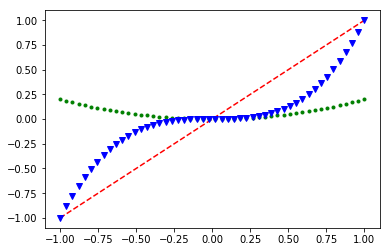

In [165]:
f, ax = plt.subplots(1,1)

xs = np.linspace(-1,1)
ys_1 = 1 *xs
ys_2 = .2 * xs**2

ys_3 = xs **3

ax.plot(xs, ys_1, 'r--') #lineea roja discontinua
ax.plot(xs, ys_2, 'g.') #linea verde de punto
ax.plot(xs, ys_3, 'bv') #linea azul

#-.(puntos y lineas..) mas en linestyle, para poner triangulos

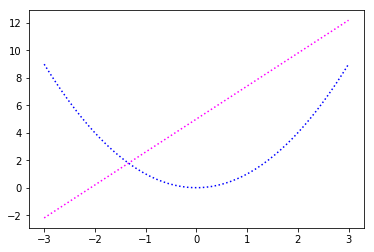

In [64]:
f, ax = plt.subplots(1,1)
ax.plot(xs,ys_1, linestyle=':', color ='fuchsia')
ax.plot(xs, ys_2, 'b:')


While most ``plt`` functions translate directly to ``ax`` methods (such as ``plt.plot()`` → ``ax.plot()``, ``plt.legend()`` → ``ax.legend()``, etc.), this is not the case for all commands.
In particular, functions to set limits, labels, and titles are slightly modified.
For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:

- ``plt.xlabel()``  → ``ax.set_xlabel()``
- ``plt.ylabel()`` → ``ax.set_ylabel()``
- ``plt.xlim()``  → ``ax.set_xlim()``
- ``plt.ylim()`` → ``ax.set_ylim()``
- ``plt.title()`` → ``ax.set_title()``

In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the ``ax.set()`` method to set all these properties at once:

[(-0.5, 0.5), (-0.5, 0.5), Text(0.5, 1.0, 'superchart')]

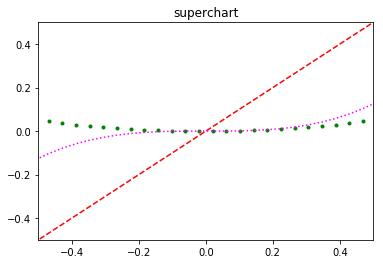

In [67]:
f, ax = plt.subplots(1,1)

xs = np.linspace(-1,1)
ys_1 = 1 *xs
ys_2 = .2 * xs**2
ys_3 = xs **3

ax.plot(xs, ys_1, 'r--') 
ax.plot(xs, ys_2, 'g.') 
ax.plot(xs, ys_3, linestyle=':', color ='fuchsia')

ax.set(xlim=(-.5,.5), ylim=(-.5, .5), title ='superchart')

#ax.set_xlim((-.5,.5))
#ax.set_ylim((-.5,.5))
#ax.set_title('superchart')

## Other attributes

http://nbviewer.jupyter.org/github/WeatherGod/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part3-HowToSpeakMPL.ipynb

## Text and Math: $\LaTeX$

$\LaTeX$ is "a high-quality typesetting system; it includes features designed for the production of technical and scientific documentation. LaTeX is the de facto standard for the communication and publication of scientific documents" ([$LaTeX$ project website](https://www.latex-project.org/)).

It's widely used for writing mathematical equations that need to be rendered accurately.

We can use it in pretty much any place we need to use text.

This is a standalone formula

$$ f(x,a) = \frac{x^{2a}}{3} $$

This is an inline expression: $\sqrt{3x}$, which you can use in matplotlib charts.

Text(0.5, 0, 'IQ($\\mu = 100$)')

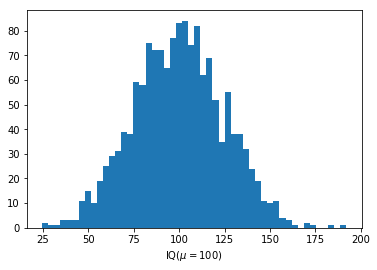

In [71]:
xs = np.random.randn(1500) * 25 +100
plt.hist(xs, bins = 50)
plt.xlabel('IQ($\mu = 100$)')


[Different font families](https://www.oreilly.com/library/view/matplotlib-2x-by/9781788295260/9af01705-e09c-4d1e-a036-ca0260d5003b.xhtml).


*  'serif': Serifs are small decorative flourishes attached to stroke ends of characters. Fonts such as Times New Roman, Century, Garamond, and Palatino are serif fonts.
*  'sans-serif': This means without serif. Fonts such as Helvetica, Arial, Calibri, and DejaVu Sans are sans-serif.
*  'monospace': Monospace fonts have characters of the same width. They are usually used for code.
* 'cursive': Cursive features connected brush strokes, usually in italic, that give a sense of classical elegance.
* 'fantasy': Decorative fonts that look funny.

## Legends

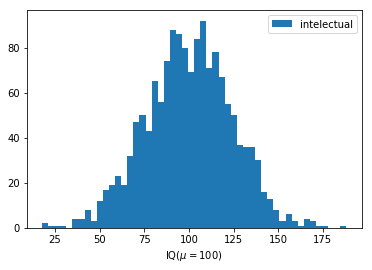

In [72]:
xs = np.random.randn(1500) * 25 +100
plt.hist(xs, bins = 50, label = 'intelectual')
plt.xlabel('IQ($\mu = 100$)')
plt.legend(); #hay q meter esto para que salga label

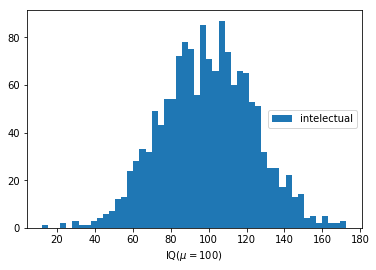

In [73]:
xs = np.random.randn(1500) * 25 +100
plt.hist(xs, bins = 50, label = 'intelectual')
plt.xlabel('IQ($\mu = 100$)')
plt.legend(loc = 'center right'); 

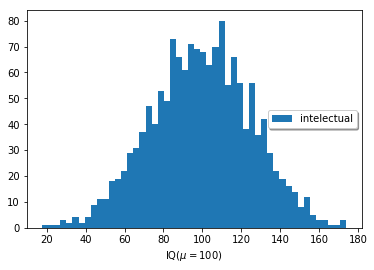

In [74]:
xs = np.random.randn(1500) * 25 +100
plt.hist(xs, bins = 50, label = 'intelectual')
plt.xlabel('IQ($\mu = 100$)')
plt.legend(loc = 'center right', shadow = True);

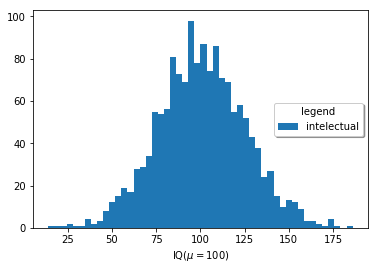

In [75]:
xs = np.random.randn(1500) * 25 +100
plt.hist(xs, bins = 50, label = 'intelectual')
plt.xlabel('IQ($\mu = 100$)')
plt.legend(loc = 'center right', shadow = True, title = 'legend'); 

#### Exercises

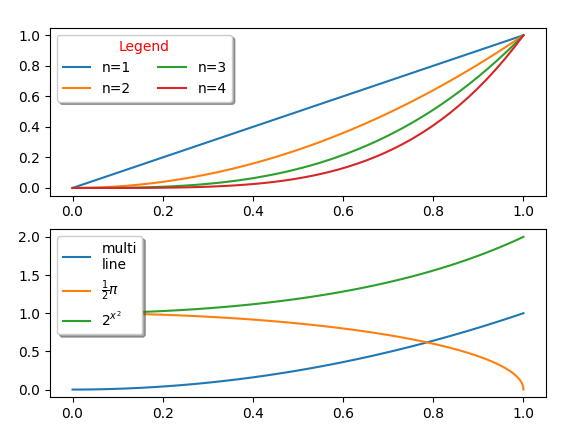

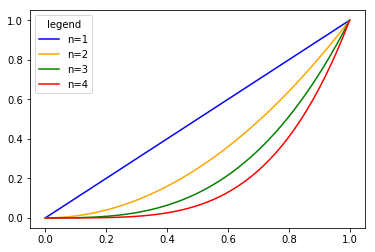

In [188]:
f, ax = plt.subplots(1,1)
xs = np.linspace(0,1)
ys_1 = xs
ys_2 = xs**2
ys_3 = xs**3
ys_4 = xs**4

ax.plot(xs, ys_1, color = 'b', label = 'n=1')
ax.plot(xs, ys_2, color = 'orange', label = 'n=2')
ax.plot(xs, ys_3, color = 'g', label = 'n=3')
ax.plot(xs, ys_4, color = 'red', label = 'n=4')

plt.legend(loc = 'upper left', title = 'legend'); 

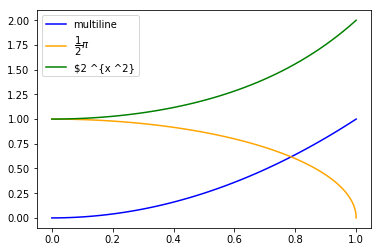

In [80]:
f, ax = plt.subplots(1,1)
xs = np.linspace(0,1)
ys_1 = xs**2
xs_2 = np.sin(np.linspace(0,np.pi/2))
ys_2 = np.cos(np.linspace(0,np.pi/2))
ys_3 = 2**(xs**2)


ax.plot(xs, ys_1, color = 'b', label = 'multiline')
ax.plot(xs_2, ys_2, color = 'orange', label = '$\dfrac{1}{2}\pi$')
ax.plot(xs, ys_3, color = 'g', label = '$2 ^{x ^2}')

plt.legend(loc = 'upper left'); 

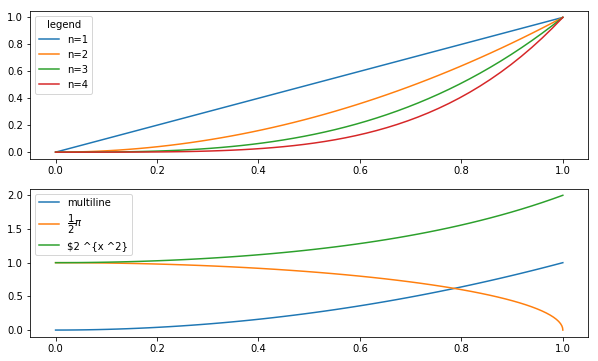

In [82]:
f, ax = plt.subplots(2,1)
f.set_size_inches(10,6)
xs = np.linspace(0,1)

#top panel

for n in range(1,5):
    ax[0].plot(xs, xs**n, label = f'n={n}')
    
ax[0].legend(title='legend')


#Bottom panel

ax[1].plot(xs, xs**2, label = 'multiline')
pi_medios = np.linspace(0, np.pi/2)
ax[1].plot(np.sin(pi_medios), np.cos(pi_medios), label = '$\dfrac{1}{2}\pi$' )
ax[1].plot(xs, 2**(xs **2), label = '$2 ^{x ^2}')

ax[1].legend()

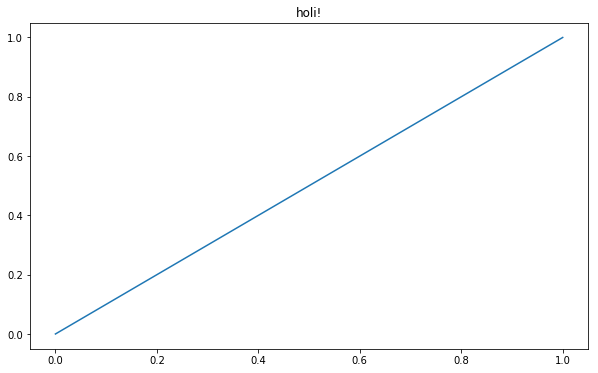

In [84]:
plt.plot(xs, xs)

plt.gca().set_title('holi!')
plt.gcf().set_size_inches(10,6)

## Styles

In [200]:
plt.style.available

['seaborn-dark-palette',
 'seaborn-notebook',
 'fivethirtyeight',
 'seaborn-dark',
 'fast',
 'Solarize_Light2',
 'grayscale',
 'seaborn',
 'seaborn-muted',
 'seaborn-colorblind',
 'seaborn-darkgrid',
 'tableau-colorblind10',
 'seaborn-whitegrid',
 'seaborn-bright',
 'seaborn-paper',
 'classic',
 'seaborn-white',
 'seaborn-talk',
 'dark_background',
 'ggplot',
 'seaborn-ticks',
 'bmh',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-deep',
 '_classic_test']

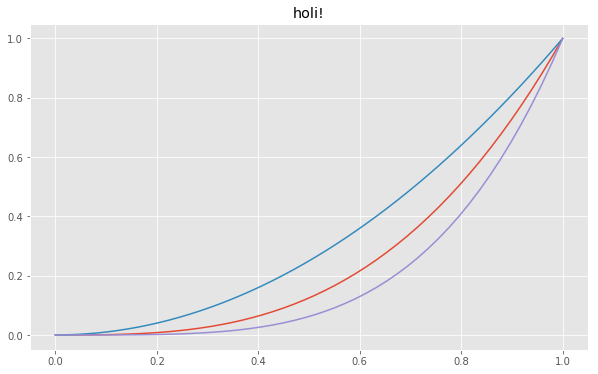

In [86]:
plt.style.use('ggplot')

plt.plot(xs, xs **3)
plt.plot(xs, xs **2)
plt.plot(xs, xs **4)

plt.gca().set_title('holi!')
plt.gcf().set_size_inches(10,6)

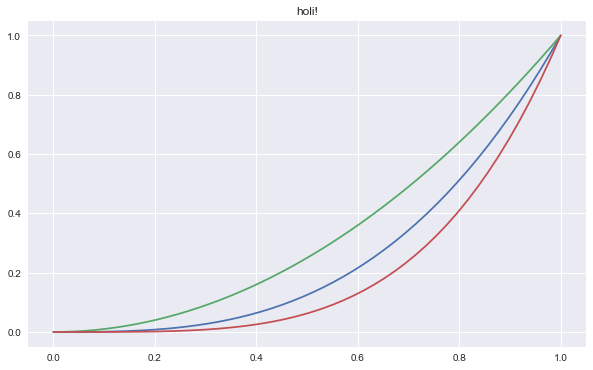

In [87]:
plt.style.use('seaborn')

plt.plot(xs, xs **3)
plt.plot(xs, xs **2)
plt.plot(xs, xs **4)


plt.gca().set_title('holi!')
plt.gcf().set_size_inches(10,6)

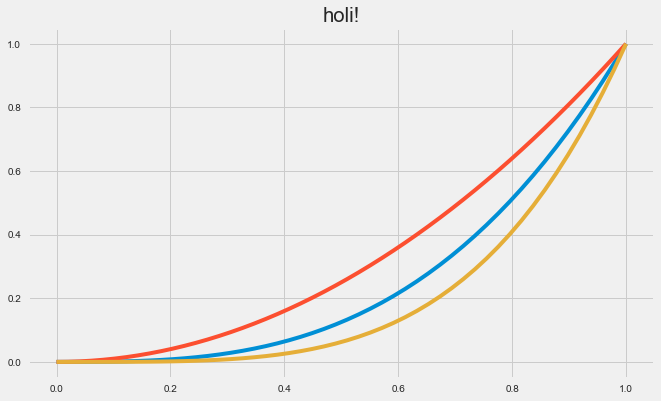

In [88]:
plt.style.use('fivethirtyeight')

plt.plot(xs, xs **3)
plt.plot(xs, xs **2)
plt.plot(xs, xs **4)


plt.gca().set_title('holi!')
plt.gcf().set_size_inches(10,6)

## Ticks, tick labels, limits

### Ticks

In [89]:
plt.style.use('ggplot')

### Ticks

### Tick labels

[Text(0, 0, 'a'),
 Text(0, 0, 'b'),
 Text(0, 0, 'c'),
 Text(0, 0, 'd'),
 Text(0, 0, 'e'),
 Text(0, 0, 'f'),
 Text(0, 0, 'g'),
 Text(0, 0, 'h'),
 Text(0, 0, 'i'),
 Text(0, 0, 'j'),
 Text(0, 0, 'k')]

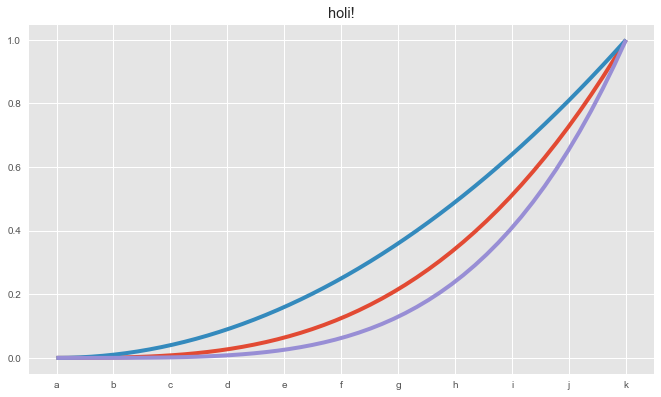

In [91]:
f, ax = plt.subplots(1,1)


ax.plot(xs, xs **3)
ax.plot(xs, xs **2)
ax.plot(xs, xs **4)

ax.set_title('holi!')
f.set_size_inches(10,6)

ax.set_xticks(np.linspace(0,1,11))
ax.set_xticklabels(list('abcdefghijk'))

### Limits

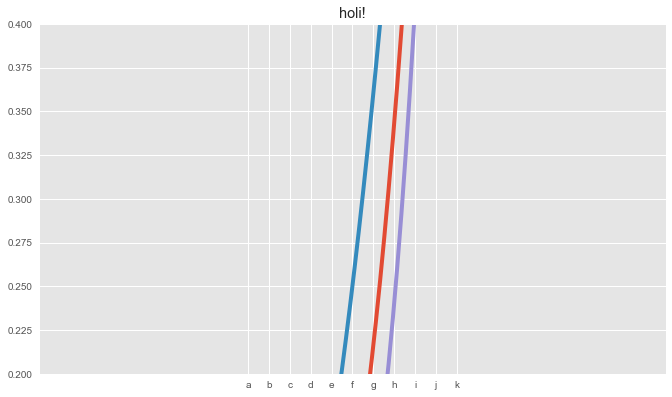

In [93]:
f, ax = plt.subplots(1,1)


ax.plot(xs, xs **3)
ax.plot(xs, xs **2)
ax.plot(xs, xs **4)

ax.set_title('holi!')
f.set_size_inches(10,6)

ax.set_xticks(np.linspace(0,1,11));
ax.set_xticklabels(list('abcdefghijk'));

ax.set_xlim((-1,2))
ax.set_ylim((.2, .4));
    
    

### Axis scales


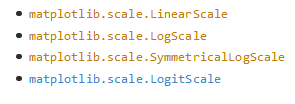




In [ ]:
# ax.set_yscale('logit'), escala logaritmica para arriba y abajo con it
#mirar solo con log tb



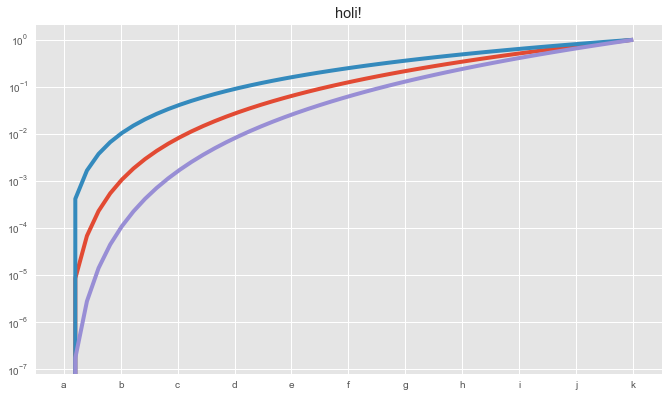

In [97]:
f, ax = plt.subplots(1,1)

ax.plot(xs, xs**3)
ax.plot(xs, xs**2)
ax.plot(xs, xs**4)

ax.set_title('holi!')
f.set_size_inches(10,6)

ax.set_xticks(np.linspace(0,1,11));
ax.set_xticklabels(list('abcdefghijk'));

ax.set_yscale('log')

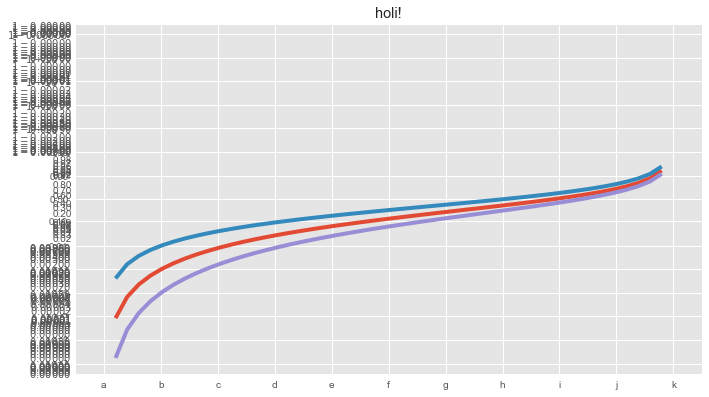

In [98]:
f, ax = plt.subplots(1,1)

ax.plot(xs, xs**3)
ax.plot(xs, xs**2)
ax.plot(xs, xs**4)

ax.set_title('holi!')
f.set_size_inches(10,6)

ax.set_xticks(np.linspace(0,1,11));
ax.set_xticklabels(list('abcdefghijk'));

ax.set_yscale('logit')

### Saving Figures to File

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats. Saving a figure can be done using the ``savefig()`` command.


total 10376
-rw-rw-r-- 1 dsc dsc  479108 nov 27 12:06  01_intro_to_notebook.ipynb
-rw-rw-r-- 1 dsc dsc  213475 dic 21 08:48  01-linear_algebra_numpy.inclass.ipynb
-rw-rw-r-- 1 dsc dsc  165108 dic 18 09:29 '05_Data Structures.ipynb'
-rw-rw-r-- 1 dsc dsc  158006 dic 18 09:51 '05_Data structures_prof.ipynb'
-rw-rw-r-- 1 dsc dsc 2923509 ene 17 19:27  06-visualization-I.Matplotlib.ipynb
-rw-rw-r-- 1 dsc dsc 5670958 ene 16 13:56  07-visualization-I16_01.ipynb
-rw-rw-r-- 1 dsc dsc     269 ene 16 13:54  app.py
-rw-rw-r-- 1 dsc dsc   12534 ene 17 19:29  current_figure.pdf
-rw-rw-r-- 1 dsc dsc   29731 ene 17 19:29  current_figure.png
-rw-rw-r-- 1 dsc dsc   69360 oct 27 17:25  dropbox_2020.03.04_amd64.deb
-rw-rw-r-- 1 dsc dsc   15177 dic 11 15:57 'Estadística descriptiva.ipynb'
-rw-rw-r-- 1 dsc dsc    3859 dic 11 15:58  iris_data.txt
-rw-rw-r-- 1 dsc dsc   69690 dic 15 12:40 'Master_class_04 - Ejercicios.pdf'
-rw-rw-r-- 1 dsc dsc  602826 dic 16 14:08  NewFinn.txt
-rw-rw-r-- 1 dsc dsc    6638 dic 

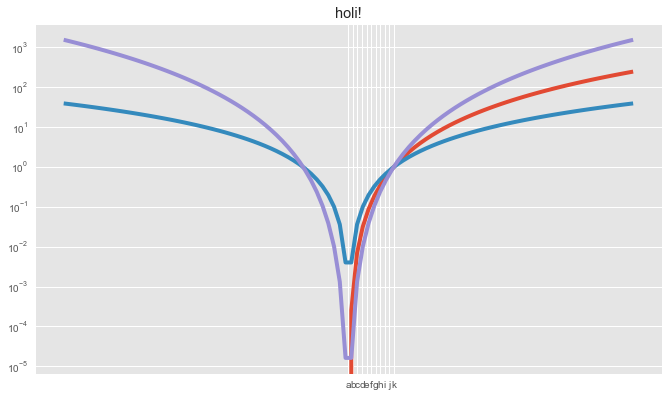

In [118]:
f, ax = plt.subplots(1,1)

ax.plot(xs, xs**3)
ax.plot(xs, xs**2)
ax.plot(xs, xs**4)

ax.set_title('holi!')
f.set_size_inches(10,6)

ax.set_xticks(np.linspace(0,1,11));
ax.set_xticklabels(list('abcdefghijk'));

ax.set_yscale('log')

plt.savefig('current_figure.pdf')

!ls -l

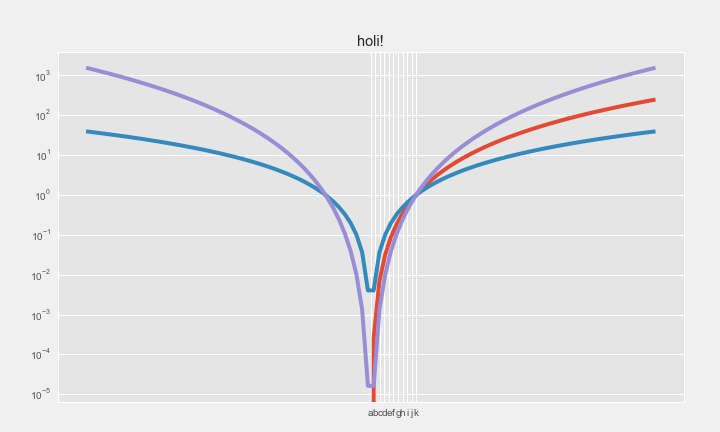

In [120]:
from PIL import Image

Image.open('current_figure.png')

### Contour plots

For representing one variable that is a function of other 2

In [ ]:
#la unica manera de representar una funcion 3D, de dos variables que saque una variable
#mapas de lineas de nivel

In [101]:
xs=np.linspace(-2 * np.pi,2 * np.pi)
ys= np.linspace(0,4*np.pi)

xs, ys

(array([-6.28318531, -6.02672876, -5.77027222, -5.51381568, -5.25735913,
        -5.00090259, -4.74444605, -4.48798951, -4.23153296, -3.97507642,
        -3.71861988, -3.46216333, -3.20570679, -2.94925025, -2.6927937 ,
        -2.43633716, -2.17988062, -1.92342407, -1.66696753, -1.41051099,
        -1.15405444, -0.8975979 , -0.64114136, -0.38468481, -0.12822827,
         0.12822827,  0.38468481,  0.64114136,  0.8975979 ,  1.15405444,
         1.41051099,  1.66696753,  1.92342407,  2.17988062,  2.43633716,
         2.6927937 ,  2.94925025,  3.20570679,  3.46216333,  3.71861988,
         3.97507642,  4.23153296,  4.48798951,  4.74444605,  5.00090259,
         5.25735913,  5.51381568,  5.77027222,  6.02672876,  6.28318531]),
 array([ 0.        ,  0.25645654,  0.51291309,  0.76936963,  1.02582617,
         1.28228272,  1.53873926,  1.7951958 ,  2.05165235,  2.30810889,
         2.56456543,  2.82102197,  3.07747852,  3.33393506,  3.5903916 ,
         3.84684815,  4.10330469,  4.35976123,  4

In [102]:

xs=np.linspace(-2 * np.pi,2 * np.pi)
ys= np.linspace(0,4*np.pi)

X, Y = np.meshgrid(xs,ys) 

In [103]:
X.shape

(50, 50)

In [104]:
xs=np.linspace(-2 * np.pi,2 * np.pi, num = 100)
ys= np.linspace(0,4*np.pi, num = 80)

X, Y = np.meshgrid(xs,ys)

In [105]:
X.shape #valores de x en una rejilla de 80 x 100 y viveversa

(80, 100)

In [106]:
Z = np.sin(X) + np.cos(Y)

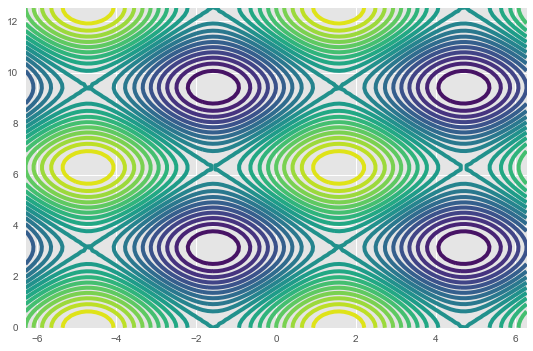

In [107]:
plt.contour(X,Y,Z, levels = 20, cmap= 'viridis')

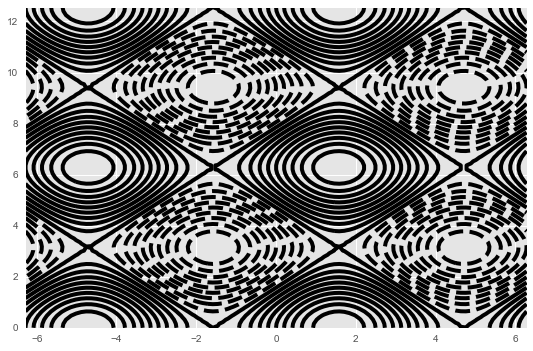

In [109]:
plt.contour(X,Y,Z, levels = 20, colors= 'black')

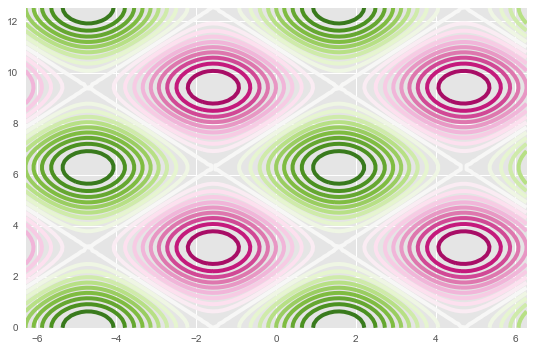

In [110]:
plt.contour(X,Y,Z, levels = 20, cmap= 'PiYG')

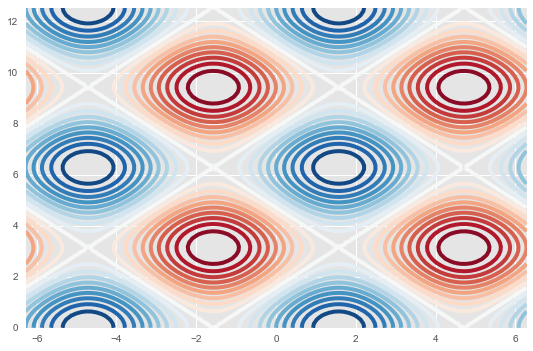

In [111]:
plt.contour(X,Y,Z, levels = 20, cmap= 'RdBu')

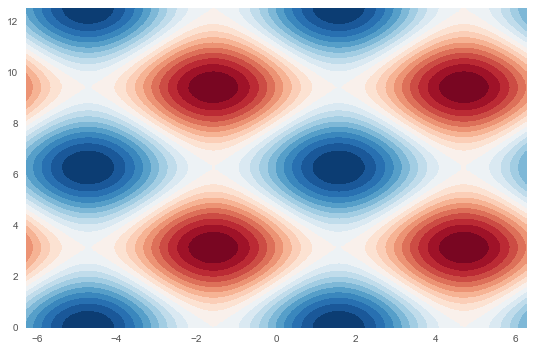

In [112]:
plt.contourf(X,Y,Z, levels = 20, cmap= 'RdBu')

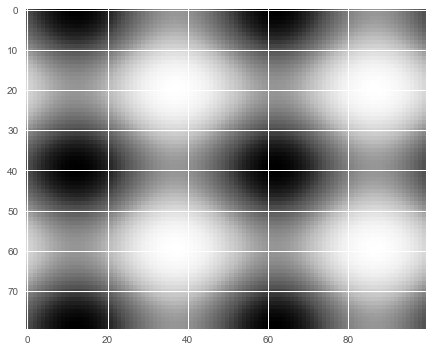

In [113]:
plt.imshow(Z)

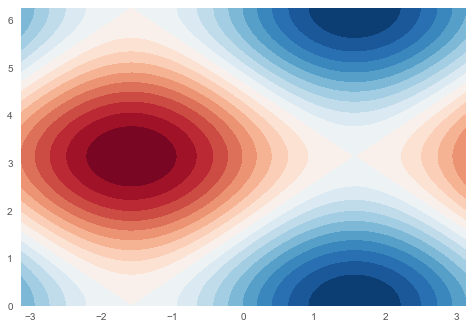

In [245]:
plt.contourf(X,Y,Z, levels = 20, cmap = 'RdBu')

There are a few potential gotchas with ``imshow()``, however:

- ``plt.imshow()`` doesn't accept an *x* and *y* grid, so you must manually specify the *extent* [*xmin*, *xmax*, *ymin*, *ymax*] of the image on the plot.
- ``plt.imshow()`` by default follows the standard image array definition where the origin is in the upper left, not in the lower left as in most contour plots. This must be changed when showing gridded data.
- ``plt.imshow()`` will automatically adjust the axis aspect ratio to match the input data; this can be changed by setting, for example, ``plt.axis(aspect='image')`` to make *x* and *y* units match.

### A note about 3D

Never use 3D plots in a flat medium. That is all.

# Additional references

[Matplotlib documentation](http://matplotlib.org/contents.html)

[The matplotlib FAQ](http://matplotlib.org/faq/usage_faq.html)

[Matplotlib cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)

[Nicolas P. Rougier's matplotlib tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)

[Anatomy of Matplotlib](https://github.com/matplotlib/AnatomyOfMatplotlib)

[$\LaTeX$](https://www.latex-project.org/)

[A quick look at altair](http://fernandoi.cl/blog/posts/altair/)


[Bokeh User Guide](http://bokeh.pydata.org/en/latest/docs/user_guide.html)

[Bokeh Tutorials](http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/index.ipynb)

[Dash](https://plot.ly/dash/)

[Dash being spotted before release](https://www.reddit.com/r/Python/comments/6imhxa/plotly_has_just_released_dash_20_a_shinylike_tool/)

[Facets](https://pair-code.github.io/facets/)

[Facets release Google research blog entry](https://research.googleblog.com/2017/07/facets-open-source-visualization-tool.html)